Considere uma câmera representada pelos eixos coordenados abaixo.
Note que o eixo Z, o qual representa o eixo óptico da câmera está apontado para cima.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)    


In [2]:
def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')
    
    ax.set_title("camera referecnce")
    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a matrix, where each column represents the vector 
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)
    

    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis 

# Código auxiliar deve ser ignorado

def translate(x, y, z):
  T = np.eye(4, 4)
  T[:3, -1] = [x, y, z]
  return T

def rotate(ang, axis):
  R = np.eye(4, 4)
  if (axis == "x"):
      R[1:3, 1:3] = np.array([[cos(ang), -sin(ang)], 
                [sin(ang), cos(ang)]])
  elif (axis == "y"):
      R[0] = [cos(ang), 0, sin(ang), 0]
      R[2] = [-sin(ang), 0, cos(ang), 0]
  else:
      R[:2, :2] = np.array([[cos(ang), -sin(ang)], 
                    [sin(ang), cos(ang)]])
  return R

In [3]:
# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

print ('Cartesian base: \n',base)
#origin point
point =np.array([[0],[0],[0],[1]])

print ('Origin: \n',point)

Cartesian base: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]
Origin: 
 [[0]
 [0]
 [0]
 [1]]


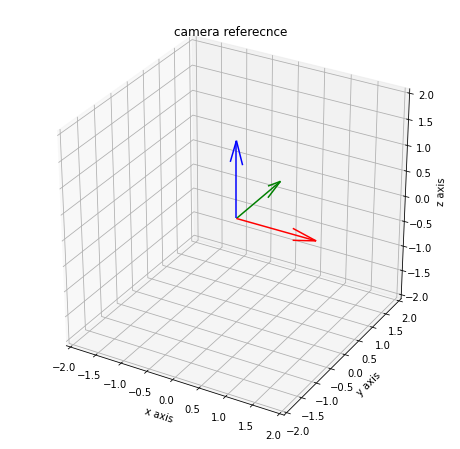

In [4]:
ax0 = set_plot()
draw_arrows(point,base,ax0)

Execute as transformações necessárias para posicionar o eixo óptico da câmera na horizontal (eixo Z), tendo o eixo Y apontando para baixo e o eixo X para a direita (sem alteração da orientação atual). Além disso, posicione essa câmera no ponto (2,7,3).

Faça o seu código abaixo. 

R:
 [[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0.  1.]]
T:
 [[1. 0. 0. 2.]
 [0. 1. 0. 7.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]]
Matriz de movimento M1:
 [[ 1.  0.  0.  2.]
 [ 0.  0.  1.  7.]
 [ 0. -1.  0.  3.]
 [ 0.  0.  0.  1.]]
Cam
: [[ 1.  0.  0.  2.]
 [ 0.  0.  1.  7.]
 [ 0. -1.  0.  3.]
 [ 0.  0.  0.  1.]]


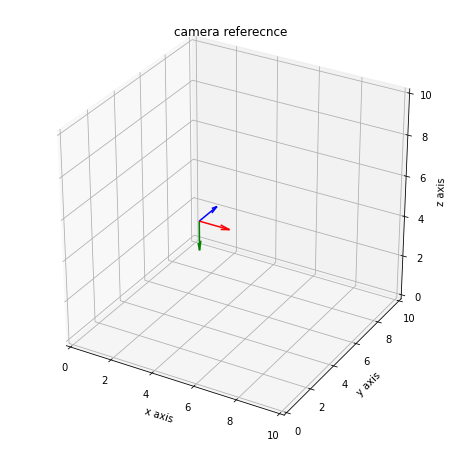

In [5]:
from math import pi,cos,sin
# Faz base
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
e4 = np.array([0,0, 0, 1]).reshape(-1, 1)
base = np.hstack((e1,e2,e3,e4))
point = np.array([0, 0, 0]).reshape(-1, 1)

# Fazendo uma rotação de 90 graus ao redor do eixo x
alpha = -np.pi/2  # 90º
R1_cam = rotate(alpha, "x")
# Matriz de Translação
T1_cam = translate(2, 7, 3)
print("R:\n", R1_cam)
print("T:\n", T1_cam)

# Matriz de movimento composto
M1_cam = T1_cam.dot(R1_cam)

print("Matriz de movimento M1:\n", M1_cam)
cam = np.dot(M1_cam, base)
print("Cam\n:",cam)
ax0 = set_plot(lim=[0, 10])
draw_arrows(cam[:, 3], cam[:, 0:3], ax0)


Vamos agora plotar o seu resultado.

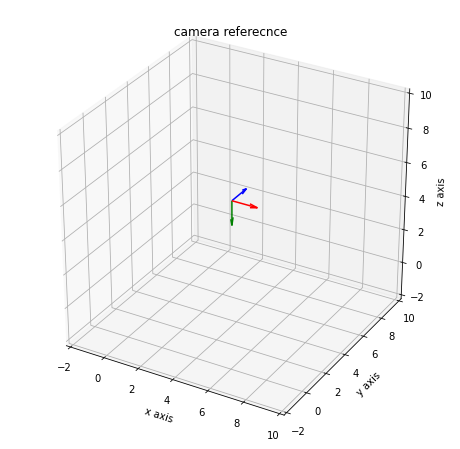

In [6]:
ax0 = set_plot(lim=[-2,10])
draw_arrows(cam[:, 3],cam,ax0)

Agora vamos incluir um objeto na cena. Vamos usar a casa que já apresentamos no material das aulas de python.

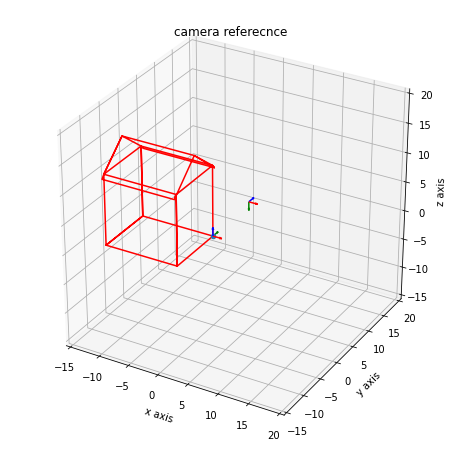

In [7]:
#Creating a house

# Função auxiliar pra resetar a casa
def create_house():
  house = np.array([[0,         0,         0],
          [0,  -10.0000,         0],
          [0, -10.0000,   12.0000],
          [0,  -10.4000,   11.5000],
          [0,   -5.0000,   16.0000],
          [0,         0,   12.0000],
          [0,    0.5000,   11.4000],
          [0,         0,   12.0000],
          [0,         0,         0],
    [-12.0000,         0,         0],
    [-12.0000,   -5.0000,         0],
    [-12.0000,  -10.0000,         0],
          [0,  -10.0000,         0],
          [0,  -10.0000,   12.0000],
  [-12.0000,  -10.0000,   12.0000],
    [-12.0000,         0,   12.0000],
          [0,         0,   12.0000],
          [0,  -10.0000,   12.0000],
          [0,  -10.5000,   11.4000],
    [-12.0000,  -10.5000,   11.4000],
    [-12.0000,  -10.0000,   12.0000],
    [-12.0000,   -5.0000,   16.0000],
          [0,   -5.0000,   16.0000],
          [0,    0.5000,   11.4000],
    [-12.0000,    0.5000,   11.4000],
    [-12.0000,         0,   12.0000],
    [-12.0000,   -5.0000,   16.0000],
    [-12.0000,  -10.0000,   12.0000],
    [-12.0000,  -10.0000,         0],
    [-12.0000,   -5.0000,         0],
    [-12.0000,         0,         0],
    [-12.0000,         0,   12.0000],
    [-12.0000,         0,         0]])

  house = np.transpose(house)

  #add a vector of ones to the house matrix to represent the house in homogeneous coordinates
  house = np.vstack([house, np.ones(np.size(house,1))])
  return house


house = create_house()

ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plote a câmera também - adicione o código abaixo
draw_arrows(cam[:, 3],cam,ax0)



Agora você deverá rotacionar a casa de -30 graus em torno do eixo Z e posicioná-la de tal forma que sua quina (0,0,0) ficará em (3, 20, 2).

Faça o seu código aqui.

R1: 
 [[ 0.866  0.5    0.     0.   ]
 [-0.5    0.866  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]
T1: 
 [[ 1.  0.  0.  3.]
 [ 0.  1.  0. 20.]
 [ 0.  0.  1.  2.]
 [ 0.  0.  0.  1.]]
Temos a matriz de movimento M: 
 [[ 0.866  0.5    0.     3.   ]
 [-0.5    0.866  0.    20.   ]
 [ 0.     0.     1.     2.   ]
 [ 0.     0.     0.     1.   ]]
Quina:  [ 3. 20.  2.  1.]


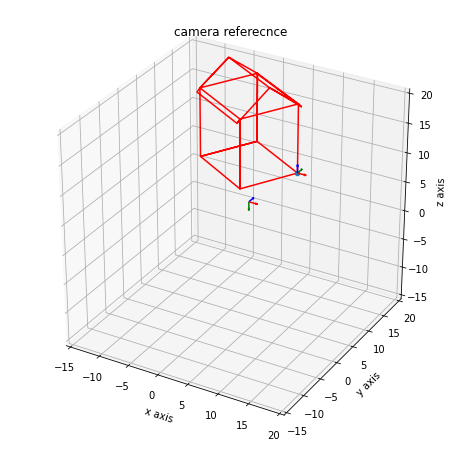

In [8]:
# Reseta a casa
house = create_house()

theta = -np.pi/6  # -30º
# Matriz de rotação
R1_house = rotate(theta, "z")

# Matriz de Translação
T1_house = translate(3, 20, 2)

print("R1: \n", R1_house)
print("T1: \n", T1_house)

# Matriz de movimento
M1_house = T1_house.dot(R1_house)

print("Temos a matriz de movimento M: \n", M1_house)

# Rotaciona a casa
house = np.dot(M1_house, house)

# Plota a casa
ax0 = set_plot(lim=[-15,20])
# Atualiza o ponto de origem da casa
draw_arrows(house[:, 0],base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plote a câmera também - adicione o código abaixo
draw_arrows(cam[:, 3],cam,ax0)
# Confirmando que a quina está certa
print("Quina: ", house[:, 0])

Agora vamos plotar a câmera e a casa no mesmo gráfico.

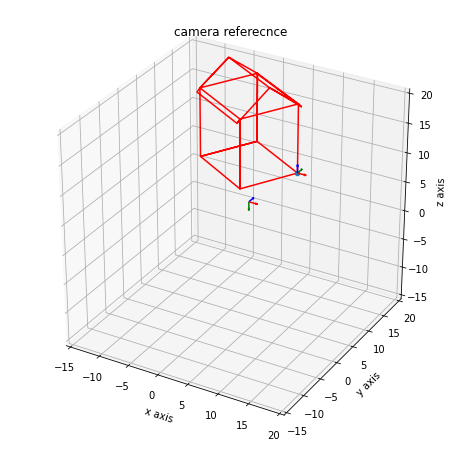

In [10]:
ax0 = set_plot(lim=[-15,20])
draw_arrows(house[:, 0],base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que agora está em (3,20,2) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plote a câmera também - adicione o código abaixo
draw_arrows(cam[:, 3],cam,ax0)


Calcule qual o valor das coordenadas da quina da casa no referencial da câmera. Lembre-se que a quina da casa está posicionada em (3, 20, 2) e que a câmera está posicionada em (2, 7, 3), ambas no referencial do mundo. Mas o referencial da câmera possui orientações diferentes do referencial do mundo. Faça o seu código logo abaixo e imprima a sua resposta usando "print".

In [14]:
# Transformação acumulada para colocar o referencial da câmera onde se encontra atualmente: 
# inclui a rotação acumulada e a translação da origem
# Essa transformação faz a conversão de coordenadas no referencial da câmera para o referencial do mundo
house_point = house[:, 0]

M_world_cam = np.linalg.inv(M1_cam)
house_point_cam = M_world_cam.dot(house_point)
print("Quina da casa no referencial da casa: \n", house_point_cam)

Quina da casa no referencial da casa: 
 [ 1.  1. 13.  1.]


Imagine agora que você deverá rotacionar a sua câmera em torno do seu eixo Y (que está na vertical) de 45 graus e depois incliná-la de -15 graus em torno do eixo X (que está na horizontal), mas sem tirá-la da posição onde ela se encontra.
Faça seu código abaixo.

cam_2: 
 [[ 0.707 -0.707  0.     2.   ]
 [ 0.     0.     1.     7.   ]
 [-0.707 -0.707  0.     3.   ]
 [ 0.     0.     0.     1.   ]]
cam_3: 
 [[ 0.707 -0.707  0.     2.   ]
 [-0.183 -0.183  0.966  7.   ]
 [-0.683 -0.683 -0.259  3.   ]
 [ 0.     0.     0.     1.   ]]


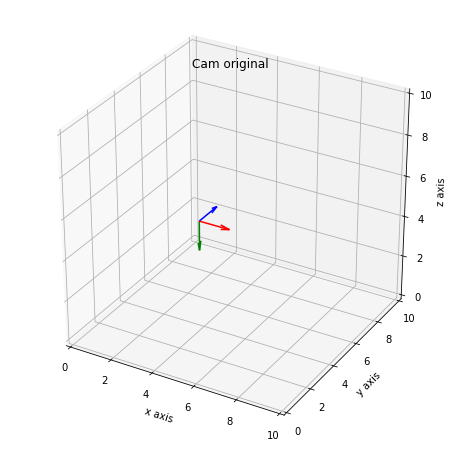

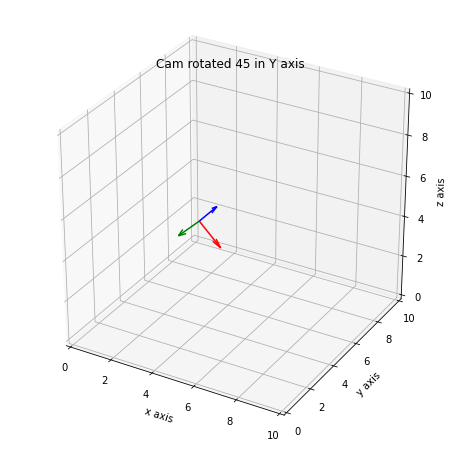

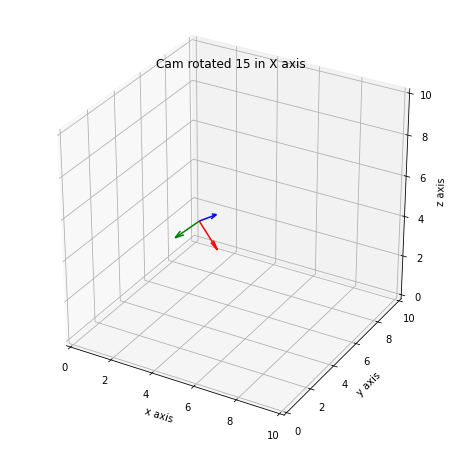

In [24]:
# Dica: Faça uma rotação de cada vez e plote o resultado em cada caso para você ter certeza de que está correto 


# Para fazer a rotação ao redor do seu próprio eixo é necessário realizar a rotação como se a câmera estivesse na origem e
# depois aplicar as transformações previormente realizadas
theta_2 = np.pi/4 # 45º
theta_3 = -np.pi/12 # -15º

R2_cam = rotate(theta_2, "y")
R3_cam = rotate(theta_3, "x")

# Base é a camera na origem
cam_2 = T1_cam.dot(R2_cam.dot(R1_cam.dot(base)))
cam_3 = T1_cam.dot(R3_cam.dot(R2_cam.dot(R1_cam.dot(base))))

print("cam_2: \n", cam_2)
print("cam_3: \n", cam_3)

ax0 = set_plot(lim=[0, 10])
ax0.set_title("Cam original")
draw_arrows(cam[:, 3],cam,ax0)

ax0 = set_plot(lim=[0, 10])
ax0.set_title("Cam rotated 45 in Y axis")
draw_arrows(cam_2[:, 3],cam_2,ax0)

# ax0 = set_plot(lim=[0, 10])
# draw_arrows(cam_2[:, 3],cam_2,ax0)
# ax0.view_init(elev=90, azim=0)

ax0 = set_plot(lim=[0, 10])
ax0.set_title("Cam rotated 15 in X axis")
draw_arrows(cam_3[:, 3],cam_3,ax0)

# ax0 = set_plot(lim=[0, 10])
# draw_arrows(cam_3[:, 3],cam_3,ax0)
# ax0.view_init(elev=90, azim=0)


Vamos agora plotar o seu resultado.

Text(2.15, 7.15, 'cam_3')

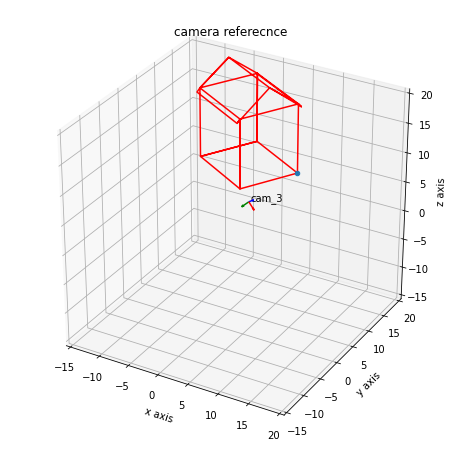

In [25]:
ax0 = set_plot(lim=[-15,20])
# draw_arrows(point,base,ax0) # tirei porque estava atrapalhando a visualização da camera
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')

# Plote a câmera também - adicione o código abaixo
draw_arrows(cam_3[:, 3],cam_3,ax0)
ax0.text(cam_3[0,3]+.15,cam_3[1,3]+.15,cam_3[2,3]+.15, "cam_3")

Calcule novamente qual o valor das coordenadas da quina da casa no referencial da câmera. Lembre-se que a quina da casa está posicionada em (3, 20, 2) e que a câmera está posicionada em (2, 7, 3), ambas no referencial do mundo. Mas o referencial da câmera possui orientações diferentes do referencial do mundo. Faça o seu código logo abaixo e imprima a sua resposta usando "print".

In [29]:
# Transformação acumulada para colocar o referencial da câmera onde se encontra atualmente: 
# inclui a rotação acumulada e a translação da origem
# Essa transformação faz a conversão de coordenadas no referencial da câmera para o referencial do mundo
# A matriz M de movimento é mudada para adicionar as novas rotações
M_new_cam = T1_cam.dot(R3_cam.dot(R2_cam.dot(R1_cam)))

M_world_cam = np.linalg.inv(M_new_cam)
house_point_cam = M_world_cam.dot(house[:, 0])
print(house_point_cam)

[-0.989 -2.403 12.816  1.   ]


Vamos agora transaladar a câmera de 5 unidades na direção de seu eixo Z. Faça o seu código abaixo.

T2_cam: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 5.]
 [0. 0. 0. 1.]]
T1_cam: 
 [[1. 0. 0. 2.]
 [0. 1. 0. 7.]
 [0. 0. 1. 3.]
 [0. 0. 0. 1.]]
Cam 5: 
 [[ 0.707 -0.707  0.     2.   ]
 [-0.183 -0.183  0.966 11.83 ]
 [-0.683 -0.683 -0.259  1.706]
 [ 0.     0.     0.     1.   ]]
Cam 5_rot: 
 [[ 0.707 -0.707  0.     0.   ]
 [-0.183 -0.183  0.966  4.83 ]
 [-0.683 -0.683 -0.259 -1.294]
 [ 0.     0.     0.     1.   ]]


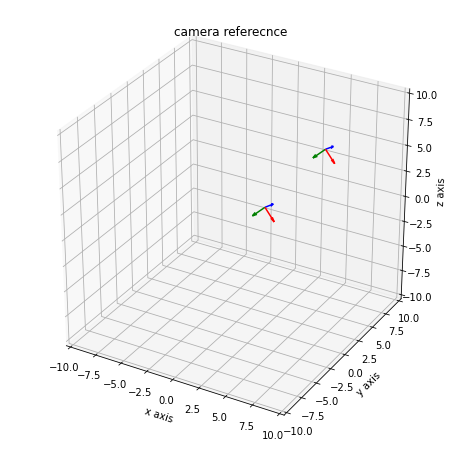

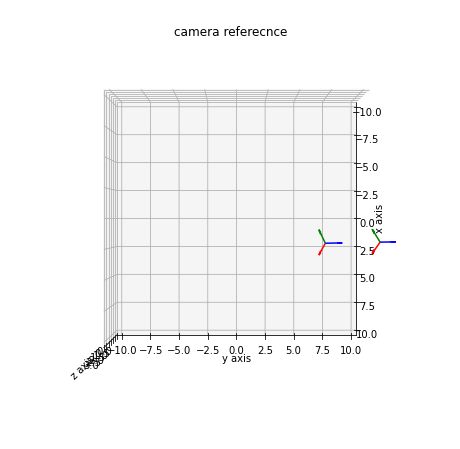

In [59]:
# Para transladar em seu próprio eixo é necessário retornar ao eixo
# M1 = R_cam + T_cam
# M2 = R3_cam*R2_cam + T2_cam


T2_cam = translate(0, 0, 5)
print("T2_cam: \n", T2_cam)
print("T1_cam: \n", T1_cam)

M2_cam = R3_cam.dot(R2_cam.dot(R1_cam))
cam_4_rot = M2_cam.dot(base)


tmp = (M2_cam[:3, :3]).dot(T2_cam[:3, 3])

M2_cam = T1_cam.dot(M2_cam.dot(T2_cam))
cam_4 = M2_cam.dot(base)
cam_4_rot[:3, 3] = tmp

print("Cam 5: \n", cam_4)
print("Cam 5_rot: \n", cam_4_rot)
ax0 = set_plot(lim=[-10, 10])
# ax0.set_zlim([0, 5])
# draw_arrows(cam_4[:, 3], cam_4, ax0)
draw_arrows(cam_4_rot[:, 3], cam_4_rot, ax0)
draw_arrows(cam_4[:, 3], cam_4, ax0)

ax0 = set_plot(lim=[-10, 10])
ax0.set_zlim([0, 3])
draw_arrows(cam_4[:, 3], cam_4, ax0)
draw_arrows(cam_3[:, 3], cam_3, ax0)
ax0.view_init(elev=90, azim=0)

Vamos plotar mais uma vez a casa e a câmera em sua nova postura (posição e orientação). Para comparação, plote também a postura anterior da câmera.

Text(2.15, 11.979629131445341, 'cam_4')

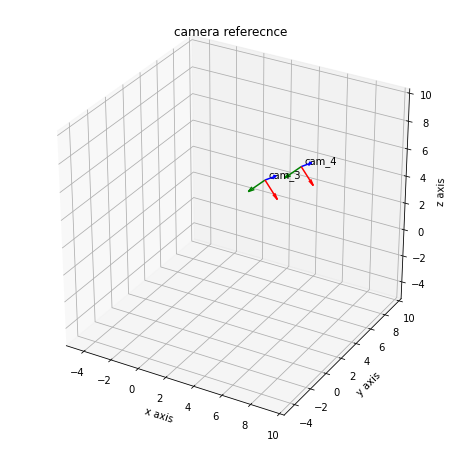

In [61]:
ax0 = set_plot(lim=[-5,10])
draw_arrows(cam_4[:3, 3],cam_4,ax0)
draw_arrows(cam_3[:3, 3],cam_3,ax0)

ax0.text(cam_3[0,3]+.15,cam_3[1,3]+.15,cam_3[2,3]+.15, "cam_3")
ax0.text(cam_4[0,3]+.15,cam_4[1,3]+.15,cam_4[2,3]+.15, "cam_4")
# Plote a câmera também - adicione o código abaixo



Por fim, vamos transladar a câmera no referencial do mundo de -10 unidades no eixo Z. Faça seu código abaixo.

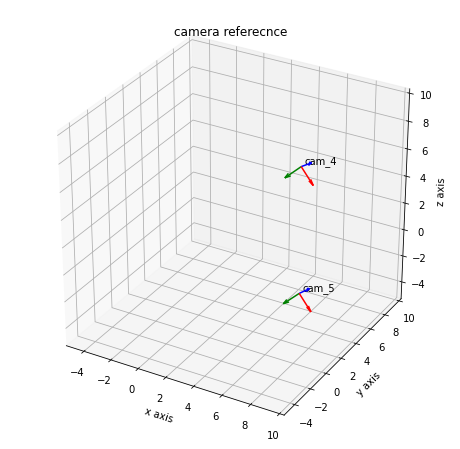

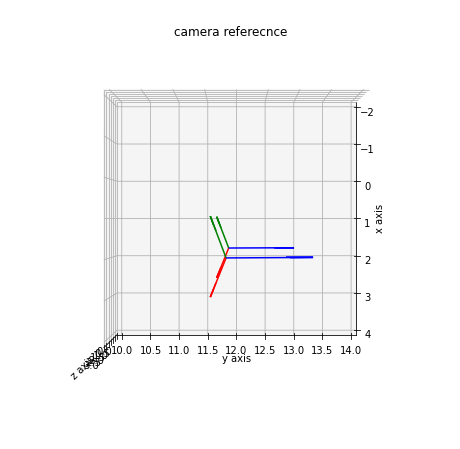

In [68]:
T3_cam = translate(0, 0, -10)
M3_cam = T3_cam.dot(M2_cam)
cam_5 = M3_cam.dot(base)

ax0 = set_plot(lim=[-5,10])
draw_arrows(cam_4[:3, 3],cam_4,ax0)
draw_arrows(cam_5[:3, 3],cam_5,ax0)

ax0.text(cam_5[0,3]+.15,cam_5[1,3]+.15,cam_5[2,3]+.15, "cam_5")
ax0.text(cam_4[0,3]+.15,cam_4[1,3]+.15,cam_4[2,3]+.15, "cam_4")
# Plote a câmera também - adicione o código abaixo

ax0 = set_plot(lim=[-5, 10])
ax0.set_zlim([0, 3])
ax0.set_xlim([-2, 4])
ax0.set_ylim([10, 14])
draw_arrows(cam_4[:, 3], cam_4, ax0)
draw_arrows(cam_5[:, 3], cam_5, ax0)
ax0.view_init(elev=90, azim=0)

E plotar mais uma vez o seu resultado, mostrando a casa, o referencial original e a câmera em sua nova postura (posição e orientação). Para comparação, plote também a postura anterior da câmera.

Text(2.15, 11.979629131445341, 'cam_4')

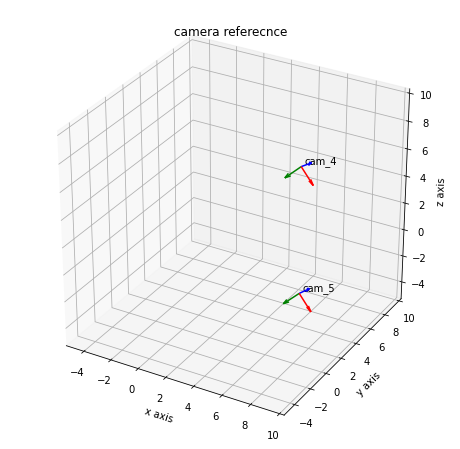

In [72]:
ax0 = set_plot(lim=[-5,10])

draw_arrows(cam_4[:3, 3],cam_4,ax0)
draw_arrows(cam_5[:3, 3],cam_5,ax0)

ax0.text(cam_5[0,3]+.15,cam_5[1,3]+.15,cam_5[2,3]+.15, "cam_5")
ax0.text(cam_4[0,3]+.15,cam_4[1,3]+.15,cam_4[2,3]+.15, "cam_4")

# Plote a câmera também - adicione o código abaixo